In [17]:
!pip install h5py numpy scikit-learn time

ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time
You should consider upgrading via the 'A:\File\Python\python.exe -m pip install --upgrade pip' command.


In [2]:
############################################## percobaan model

import h5py
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Path untuk file HDF5
hdf5_file = 'features.h5'

# Fungsi untuk memuat fitur dan label dari file HDF5
def load_features_from_hdf5(hdf5_file):
    with h5py.File(hdf5_file, 'r') as hf:
        features = np.array(hf.get('features'))
        labels = np.array(hf.get('labels'))
    return features, labels

# Memuat fitur dan label dari file HDF5
features, labels = load_features_from_hdf5(hdf5_file)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [3]:
# Memuat fitur dan label dari file HDF5
features, labels = load_features_from_hdf5(hdf5_file)

# Mengecek dimensi fitur
print("Dimensi fitur:", features.shape)  # Periksa jumlah baris dan kolom fitur

# Melihat beberapa contoh fitur
print("Contoh fitur:")
print(features[:5])  # Melihat lima baris pertama dari fitur

# Melihat beberapa contoh label
print("Contoh label:")
print(labels[:10])  # Melihat lima label pertama

# Memeriksa apakah jumlah baris fitur cocok dengan jumlah label
assert len(features) == len(labels), "Jumlah baris fitur tidak sama dengan jumlah label"
print("Jumlah baris fitur cocok dengan jumlah label.")


Dimensi fitur: (4225, 25088)
Contoh fitur:
[[ 0.        0.        0.       ...  0.        9.658791  0.      ]
 [ 0.        0.        0.       ...  0.        9.440987  0.      ]
 [ 0.        0.        0.       ...  0.       15.509188  0.      ]
 [ 0.        0.        0.       ...  0.       13.811828  0.      ]
 [ 0.        0.        0.       ...  0.       10.578276  0.      ]]
Contoh label:
[b'cataract' b'cataract' b'cataract' b'cataract' b'cataract' b'cataract'
 b'cataract' b'cataract' b'cataract' b'cataract']
Jumlah baris fitur cocok dengan jumlah label.


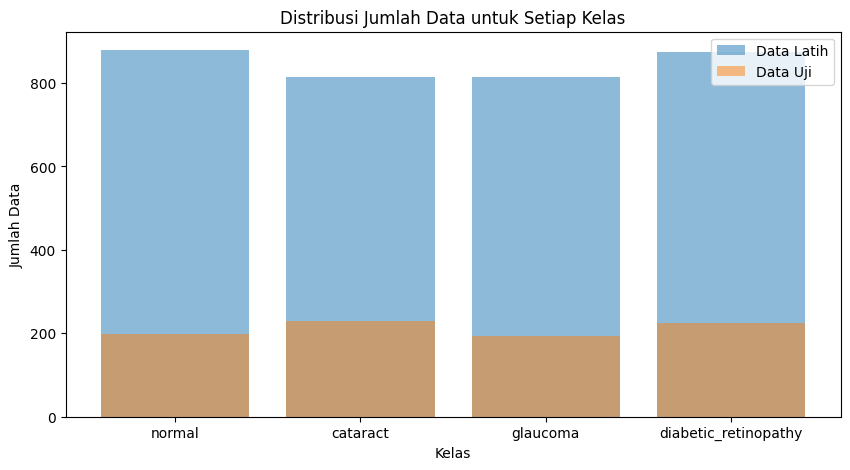

In [5]:
import matplotlib.pyplot as plt

# Menghitung jumlah data untuk setiap kelas dalam data latih dan data uji
train_class_distribution = {label: sum(y_train == label) for label in set(y_train)}
test_class_distribution = {label: sum(y_test == label) for label in set(y_test)}

# Plot histogram
plt.figure(figsize=(10, 5))
plt.bar(train_class_distribution.keys(), train_class_distribution.values(), alpha=0.5, label='Data Latih')
plt.bar(test_class_distribution.keys(), test_class_distribution.values(), alpha=0.5, label='Data Uji')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Jumlah Data untuk Setiap Kelas')
plt.legend()
plt.show()


In [19]:
train_class_distribution


{b'glaucoma': 815,
 b'cataract': 813,
 b'diabetic_retinopathy': 873,
 b'normal': 879}

In [18]:
test_class_distribution

{b'glaucoma': 192,
 b'cataract': 229,
 b'diabetic_retinopathy': 225,
 b'normal': 199}

### RANDOM FOREST

In [10]:
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Konversi label menjadi tipe data numerik
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Melatih model menggunakan Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

print("Mulai pelatihan model...")
start_time = time.time()
rf_model.fit(X_train, y_train_encoded)
end_time = time.time()
print("Pelatihan model selesai dalam waktu: {:.2f} detik".format(end_time - start_time))

# Memprediksi kelas untuk data uji
print("Mulai prediksi...")
start_time = time.time()
y_pred_encoded = rf_model.predict(X_test)
end_time = time.time()
print("Prediksi selesai dalam waktu: {:.2f} detik".format(end_time - start_time))

# Hitung akurasi model
randomforest_model_accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print("Akurasi model Random Forest setelah encoding:", randomforest_model_accuracy)


Mulai pelatihan model...
Pelatihan model selesai dalam waktu: 28.71 detik
Mulai prediksi...
Prediksi selesai dalam waktu: 0.10 detik
Akurasi model Random Forest setelah encoding: 0.8852071005917159


###   DECISION TREE

In [4]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

In [5]:
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()


######### ubah tipe data numerik # Konversi label menjadi tipe data numerik
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


print("Mulai pelatihan model Decision Tree...")
start_time = time.time()
dt_model.fit(X_train, y_train_encoded)
end_time = time.time()
print("Pelatihan model Decision Tree selesai dalam waktu: {:.2f} detik".format(end_time - start_time))

# Memprediksi kelas untuk data uji
print("Mulai prediksi dengan model Decision Tree...")
start_time = time.time()
y_pred_dt_encoded = dt_model.predict(X_test)
end_time = time.time()
print("Prediksi dengan model Decision Tree selesai dalam waktu: {:.2f} detik".format(end_time - start_time))

# Hitung akurasi model Decision Tree
decisiontree_model_accuracy = accuracy_score(y_test_encoded, y_pred_dt_encoded)
print("Akurasi model Decision Tree setelah encoding:", decisiontree_model_accuracy)


Mulai pelatihan model Decision Tree...
Pelatihan model Decision Tree selesai dalam waktu: 65.92 detik
Mulai prediksi dengan model Decision Tree...
Prediksi dengan model Decision Tree selesai dalam waktu: 0.04 detik
Akurasi model Decision Tree setelah encoding: 0.7739644970414201


### KNN

In [6]:
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Konversi label menjadi tipe data numerik
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Melatih model menggunakan K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)

print("Mulai pelatihan model KNN...")
start_time = time.time()
knn_model.fit(X_train, y_train_encoded)
end_time = time.time()
print("Pelatihan model KNN selesai dalam waktu: {:.2f} detik".format(end_time - start_time))

# Memprediksi kelas untuk data uji
print("Mulai prediksi dengan model KNN...")
start_time = time.time()
y_pred_encoded_knn = knn_model.predict(X_test)
end_time = time.time()
print("Prediksi dengan model KNN selesai dalam waktu: {:.2f} detik".format(end_time - start_time))

# Hitung akurasi model KNN
knn_model_accuracy = accuracy_score(y_test_encoded, y_pred_encoded_knn)
print("Akurasi model KNN setelah encoding:", knn_model_accuracy)


Mulai pelatihan model KNN...
Pelatihan model KNN selesai dalam waktu: 0.21 detik
Mulai prediksi dengan model KNN...
Prediksi dengan model KNN selesai dalam waktu: 5.34 detik
Akurasi model KNN setelah encoding: 0.8272189349112427


### PERBANDINGAN AKURASI

In [7]:
!pip install seaborn

You should consider upgrading via the 'A:\File\Python\python.exe -m pip install --upgrade pip' command.


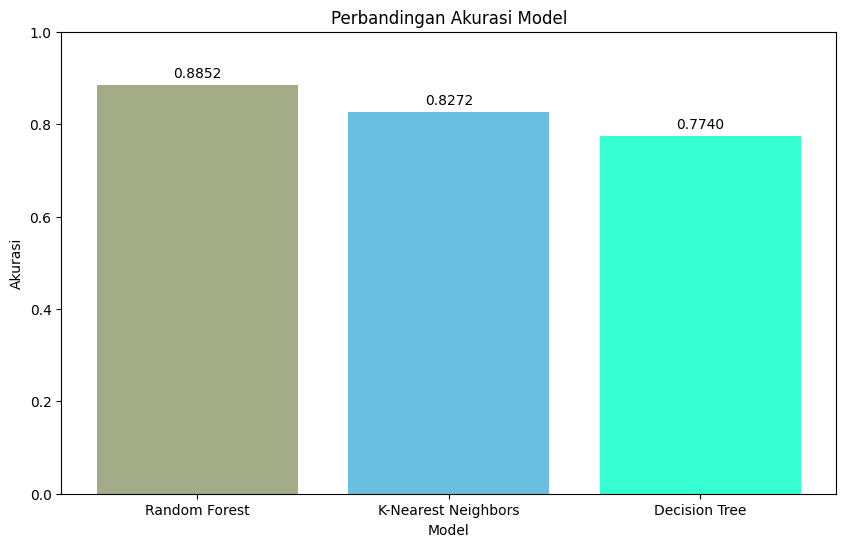

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

rf_accuracy = randomforest_model_accuracy
knn_accuracy = knn_model_accuracy
dt_accuracy = decisiontree_model_accuracy

# Labels dan akurasi untuk masing-masing model
models = ['Random Forest', 'K-Nearest Neighbors', 'Decision Tree']
accuracies = [rf_accuracy, knn_accuracy, dt_accuracy]

# **Memilih warna yang diinginkan**
# colors = ['rgb(64, 67, 135)', 'rgb(41, 120, 142)', 'rgb(34, 167, 132)']
colors = [(0.64, 0.67, 0.53), (0.41, 0.75, 0.88), (0.21, 1.0, 0.82)]


# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=colors)

# Menambahkan judul dan label sumbu
plt.title('Perbandingan Akurasi Model')
plt.xlabel('Model')
plt.ylabel('Akurasi')

# Menampilkan nilai akurasi di atas bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom')

# Menampilkan plot
plt.ylim(0, 1)  # Mengatur batas y-axis dari 0 hingga 1 untuk memperjelas akurasi
plt.show()


### TEKNIK RANDOM FOREST MEMBERIKAN AKURASI TERTINGGI YAITU 88,5%